# Интерполяционный многочлен в форме Лагранжа

## Общие сведения

Интерполяционный многочлен Лагранжа — многочлен минимальной степени, принимающий данные значения в данном наборе точек. Для $n+1$ пар чисел $(x_0, y_0), (x_1, y_1),\dots, (x_n, y_n)$, где все $x_j$ различны, существует единственный многочлен $L(x)$ степени не более n, для которого $L(x_j) = y_j$.

В простейшем случае (n=1) — это линейный многочлен, график которого — прямая, проходящая через две заданные точки.

## Способ вычисления многочлена Лагранжа  
Для вычисления многочлена используется следующая формула: $$ L(x)=\sum_{i=0}^{n} y_i l_i(x) $$, где $$ {l_{i}(x)=\prod _{j=0,j\neq i}^{n}{\frac {x-x_{j}}{x_{i}-x_{j}}}={\frac {x-x_{0}}{x_{i}-x_{0}}}\cdots {\frac {x-x_{i-1}}{x_{i}-x_{i-1}}}\cdot {\frac {x-x_{i+1}}{x_{i}-x_{i+1}}}\cdots {\frac {x-x_{n}}{x_{i}-x_{n}}}} $$

## Пример
Многочлены Лагранжа степеней от нулевой до пятой для функции  $\cos(5\pi x)$  
![Example](https://upload.wikimedia.org/wikipedia/commons/2/2c/Lagrange_polynomials_of_increasing_degrees.gif "Text")

## Решение задачи


Для начала подключим необходимы библиотеки

In [1]:
import numpy as np # библиотека для хранения массивов
from sympy import *
import matplotlib.pyplot as plt # библиотека для построения графиков
%matplotlib

Using matplotlib backend: TkAgg


Далее объявляем функцию для организации вычислений по формуле интерполяционного многочлена Лагранжа

In [2]:
def lgrn(x, y, e):
    pol = 0 # Переменная для накопления значения полинома
    for j in range(len(y)):
        p1 = 1
        p2 = 1
        for i in range(len(x)):
            if i == j:
                p1 *= 1
                p2 *= 1
            else:
                p1 *= e - x[i]
                p2 *= x[j] - x[i]
        pol += y[j] * p1 / p2
    return pol

Задаём значения нашей функции

In [3]:
#x = np.linspace(-3, 3, 21)
#y = x**3
x = np.linspace(-10,3, 21)
y = np.exp(x)

Задаём степень полинома и получаем значения в узлах

In [4]:
d = 3 # Степень полинома
xnodes = x[::int((len(x) - 1) / d)]
ynodes = y[::int((len(y) - 1) / d)]

Вычисляем полином

In [5]:
e = Symbol('x')
f = lgrn(xnodes, ynodes, e).expand()
f

0.0144647895836323*x**3 + 0.268202126134354*x**2 + 1.45155174067076*x + 2.16013977683425

Получаем значения функции для нашего полинома

In [8]:
ynew = [f.subs(e, i) for i in x]

Строим график

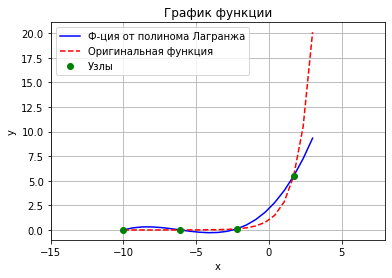

In [7]:
plt.plot(x, ynew, color='blue', label='Ф-ция от полинома Лагранжа')
plt.plot(x, y, color='red', label='Оригинальная функция', linestyle='--')
plt.plot(xnodes, ynodes, color='green', label='Узлы', marker='o', linestyle='')
#mlines.Line2D(xnodes, ynodes)

plt.grid()
plt.legend(loc='best')

plt.xlabel('x')
plt.ylabel('y')

plt.ylim(min(y) - 1, max(y) + 1)
plt.xlim(min(x) - 5, max(x) + 5)

plt.title(r'График функции');